In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("/Users/stevenmacauda/Downloads/Sample - Superstore.xls")

## Data Cleaning

In [3]:
df.shape

(9994, 21)

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df = df.drop(columns=['Row ID', 'Order ID', 'Customer ID'])

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.dtypes

Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
df.duplicated().sum()

1

In [10]:
data=df.drop(['Country', 'Postal Code'], axis=1)
data.shape

(9994, 16)

<AxesSubplot:>

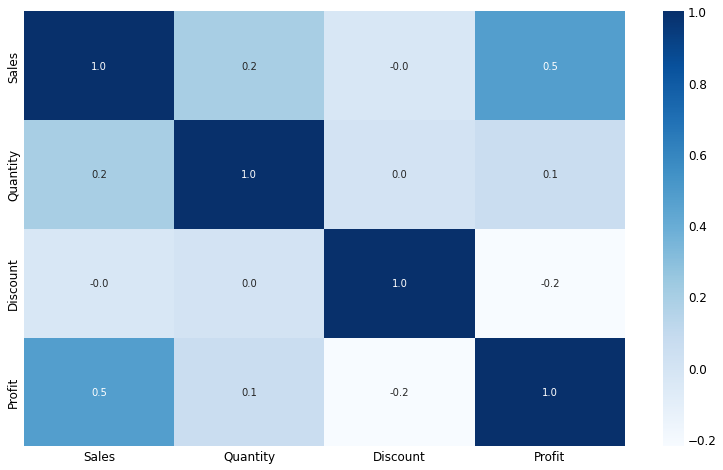

In [11]:
#Checking the corelations between numeric columns
df_con=data.select_dtypes(include=[np.number]) #getting the numeracal features
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_con.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax, cmap="Blues") #plotting a heatmap

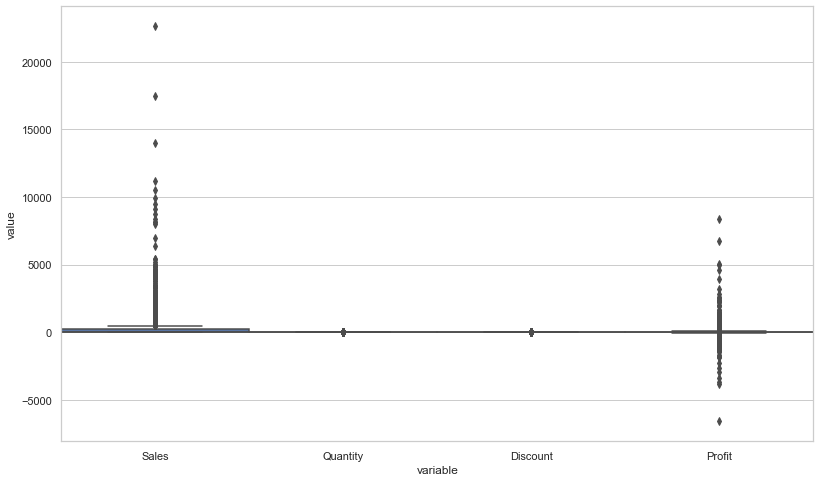

In [12]:
#BoxPlot to see the outliers clearly
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df_con), width=1)

plt.show()

In [13]:
#Removal of Outliers
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [14]:
remove_outlier(data,k=3.33)

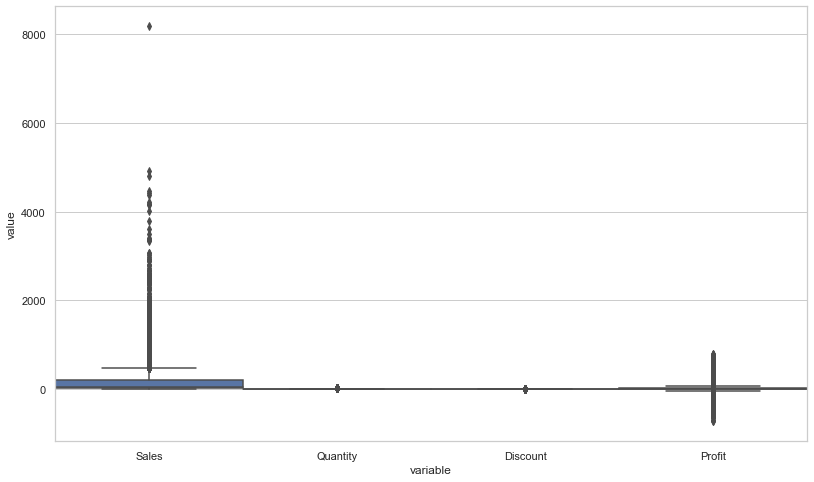

In [15]:
#Let's see the outliers are removed or not
ds_con=ds.select_dtypes(include=[np.number])
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(ds_con), width=1)

plt.show()

In [55]:
ds

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Tom Boeckenhauer,Consumer,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## Data Exploration

In [16]:
ds.describe()

,Sales,Quantity,Discount,Profit
count,9906.000000,9906.000000,9906.000000,9906.000000
mean,196.334177,3.775389,0.155057,24.124557
std,383.685746,2.220942,0.204990,94.087165
min,0.444000,1.000000,0.000000,-734.526400
25%,17.088000,2.000000,0.000000,1.751550
50%,52.760000,3.000000,0.200000,8.606400
75%,201.866000,5.000000,0.200000,28.847950
max,8187.650000,14.000000,0.800000,793.716000


In [17]:
#What are the numbers of unique entries in the Categorical columns
for col in ds.columns:
    if ds[col].dtype=='object':
        print("Number of unique entries in",col + " are",ds[col].nunique())
        print("=================================================")

Number of unique entries in Ship Mode are 4
Number of unique entries in Customer Name are 793
Number of unique entries in Segment are 3
Number of unique entries in City are 531
Number of unique entries in State are 49
Number of unique entries in Region are 4
Number of unique entries in Product ID are 1848
Number of unique entries in Category are 3
Number of unique entries in Sub-Category are 17
Number of unique entries in Product Name are 1836


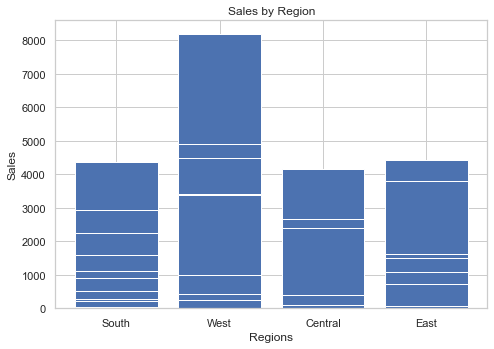

In [18]:
#Sales by region
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ds['Region'],ds['Sales'])
plt.title("Sales by Region")
plt.xlabel("Regions")
plt.ylabel("Sales")
plt.show()

Text(0.5, 1.0, 'Top 3 Sales by Region')

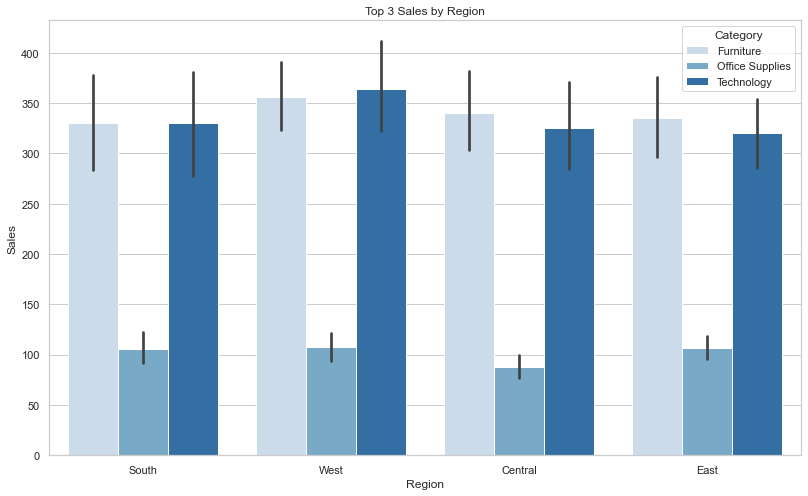

In [19]:
#Top 3 Sales by Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=ds, palette="Blues")
plt.title('Top 3 Sales by Region')

Text(0.5, 1.0, 'Shipping by Location Type and Shipping Class')

<Figure size 1080x576 with 0 Axes>

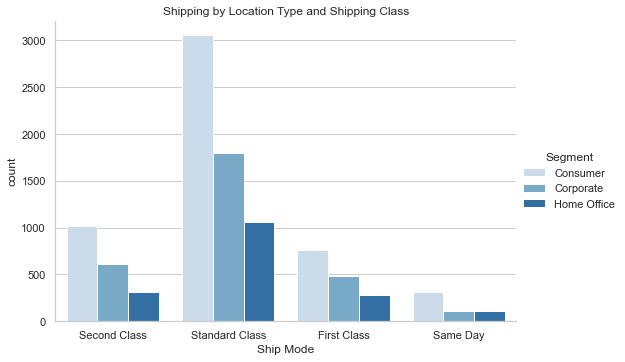

In [20]:
#Shipping by Location Type and Ship Mode
plt.figure(figsize=[15,8])
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette="Blues")
plt.title('Shipping by Location Type and Shipping Class')

Text(0.5, 1.0, 'Sales per Shipping Location by Region')

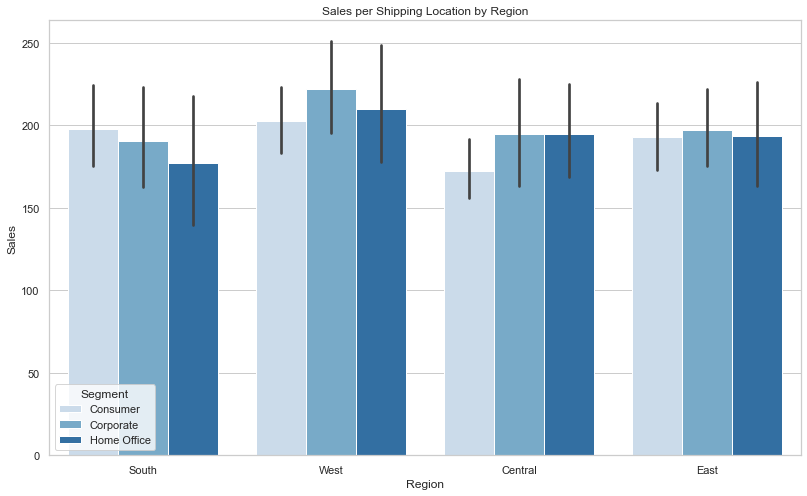

In [21]:
#Sales per Shipping Location by Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds, palette="Blues")
plt.title('Sales per Shipping Location by Region')

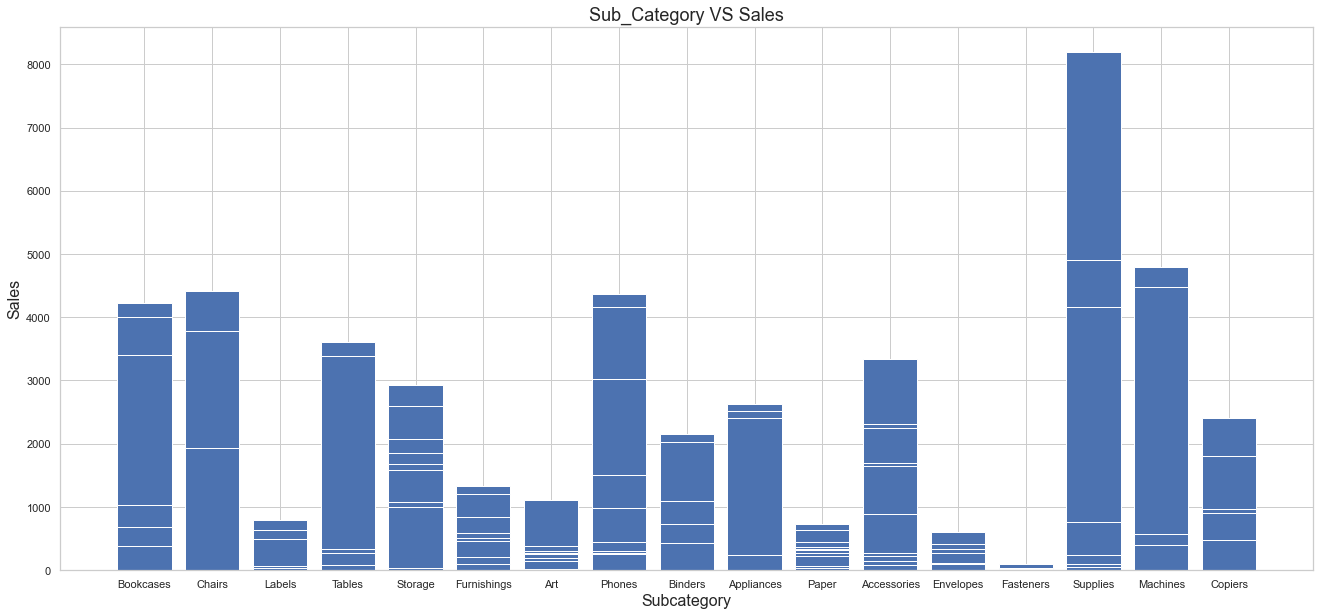

In [22]:
#Sales vs Subcategory
plt.figure(figsize=[20,10])
plt.bar("Sub-Category","Sales",data=ds)
plt.title("Sub_Category VS Sales",fontsize=18)
plt.xlabel("Subcategory", fontsize=16)
plt.ylabel("Sales",fontsize=16)
plt.show()

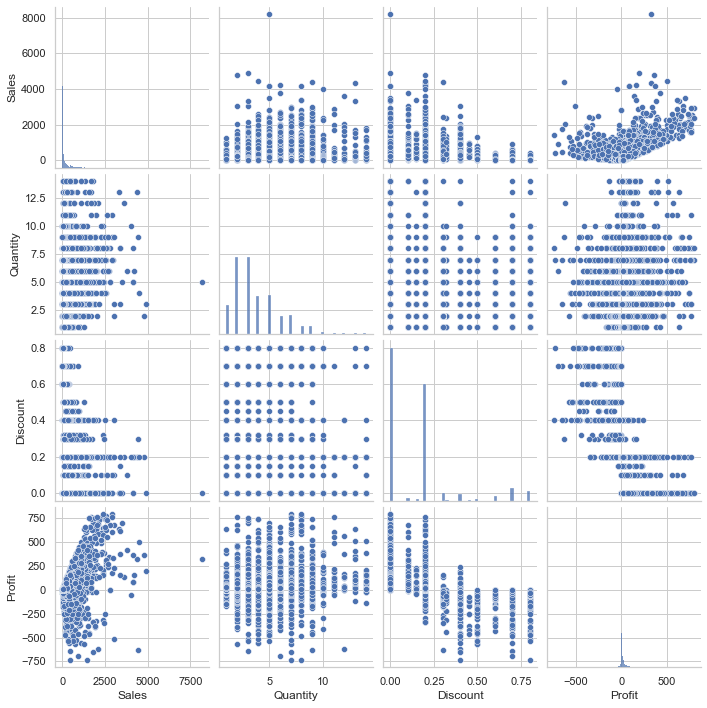

In [23]:
#Let's get some aggregated views from pairplot
sns.pairplot(ds)

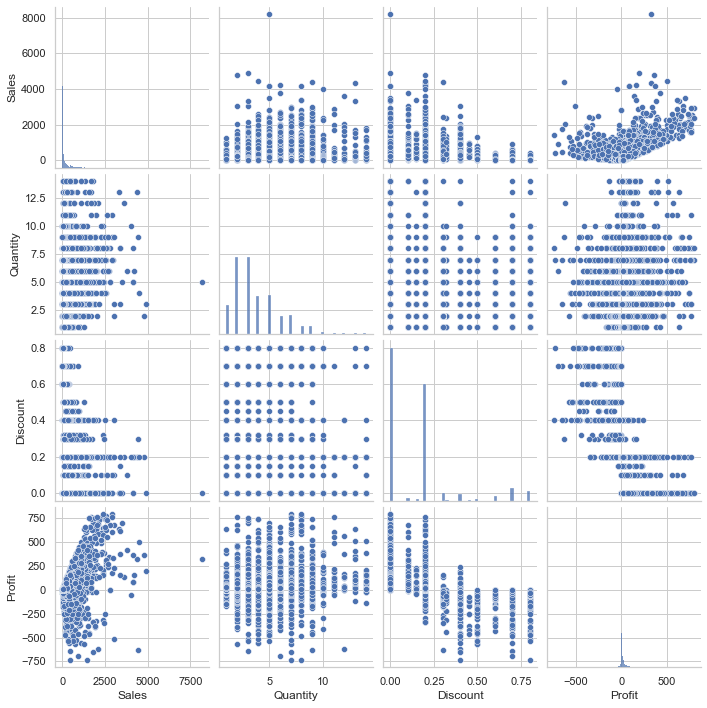

In [24]:
#Let's get some aggregated views from pairplot
sns.pairplot(ds)

In [25]:
#Let's get some insights based on Cities
grouped= ds.groupby("City")
#Aggregated Sales per city
agg_sales=grouped['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()
#Cities with highest total sales
agg_sales.head()

,City,Sales
0,New York City,197295.143
1,Los Angeles,164453.989
2,San Francisco,109869.132
3,Seattle,96330.948
4,Philadelphia,91788.401


In [26]:
#Aggregated Profit per city
agg_profit=grouped['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()
#Cities with Highest total Profit
agg_profit.head()

,City,Profit
0,New York City,39957.8971
1,Los Angeles,26553.7452
2,Seattle,18951.2609
3,San Francisco,16562.3989
4,Detroit,8235.4208


In [27]:
#Aggregate Discount per city
agg_dist=grouped['Discount'].agg(np.sum).sort_values(ascending=False).reset_index()

#Cities with highest aggregated Discount
agg_dist.head()

,City,Discount
0,Philadelphia,173.70
1,Houston,139.94
2,Chicago,118.70
3,Dallas,55.50
4,Los Angeles,54.70


In [28]:
#Average Sales per city
avg_sales=grouped['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average sales
avg_sales.head()

,City,Sales
0,Cheyenne,1603.136000
1,Bellingham,1263.413333
2,Independence,1208.685000
3,Burbank,1082.386000
4,Buffalo,906.349600


In [29]:
#Cities with lowest Average sales
avg_sales.tail()
#Average Profit per city
avg_profit=grouped['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average profit
avg_profit.head()

,City,Profit
0,Independence,487.831500
1,Appleton,277.383150
2,Burbank,254.844600
3,Lehi,225.831300
4,Beverly,218.306467


In [30]:
#Cities with lowest Average profit
avg_profit.tail()

,City,Profit
526,Rockford,-104.500709
527,Normal,-110.023200
528,Yuma,-116.497725
529,Oswego,-178.709200
530,Champaign,-182.352000


In [31]:
#Average Discount per city
avg_dist=grouped['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average discount
avg_dist.head()

,City,Discount
0,Missouri City,0.8
1,Romeoville,0.8
2,Deer Park,0.8
3,Abilene,0.8
4,Elyria,0.7


In [32]:
#Cities with lowest Average Discount
avg_dist.tail()

,City,Discount
526,Mobile,0.0
527,Montebello,0.0
528,Montgomery,0.0
529,Moorhead,0.0
530,Aberdeen,0.0


## Feature Engineering

In [33]:
#Cities having High Average Discounts
high_dist=avg_dist[avg_dist['Discount'] >=0.7]

In [34]:
#Cities having low Average Discounts
low_dist=avg_dist[avg_dist['Discount']==0]

In [35]:
#Cities having High Average Sales
high_sales=avg_sales[avg_sales['Sales']>500]

In [36]:
#Cities having low Average Sales
low_sales=avg_sales[avg_sales['Sales']<50]

In [37]:
#Cities having High Average Profit
high_profit=avg_profit[avg_profit['Profit']>100]

In [38]:
#Cities having low Average profit
low_profit=avg_profit[avg_profit['Profit']<0]

In [39]:
#Cities with High-Average-Discounts but Low-Average-Sales
merged= pd.merge(high_dist,low_sales, on=['City'],how='inner')
merged

,City,Discount,Sales
0,Missouri City,0.8,6.370
1,Romeoville,0.8,8.952
2,Deer Park,0.8,6.924
3,Abilene,0.8,1.392
4,Elyria,0.7,1.824
5,Ormond Beach,0.7,2.808
6,Pensacola,0.7,2.214


In [40]:
#Cities with high Average Sales as well as Average Profit
merged2= pd.merge(high_sales,high_profit, on=['City'], how='inner')
merged2

,City,Sales,Profit
0,Cheyenne,1603.136000,100.196000
1,Bellingham,1263.413333,203.530267
2,Independence,1208.685000,487.831500
3,Burbank,1082.386000,254.844600
4,Beverly,861.063333,218.306467
5,Appleton,835.655000,277.383150
6,Torrance,783.067000,136.287750
7,Lehi,758.363000,225.831300
8,Saint Peters,697.160000,146.403600
9,Norman,675.665000,134.764350


In [41]:
#Cities where Average Discount is less but Average Sales is High
merged3= pd.merge(low_dist,high_sales, on='City', how='inner')
merged3

,City,Discount,Sales
0,Saint Peters,0.0,697.160000
1,Appleton,0.0,835.655000
2,Harrisonburg,0.0,626.958571
3,Independence,0.0,1208.685000
4,Dubuque,0.0,562.433333
5,Noblesville,0.0,772.795000
6,Norman,0.0,675.665000
7,Beverly,0.0,861.063333
8,Morristown,0.0,539.853333
9,Madison,0.0,534.679000


In [42]:
#Cities with high Average sales but low Average profit
merged4= pd.merge(high_sales,low_profit, on='City', how='inner')
merged4

,City,Sales,Profit
0,Richardson,644.232,-12.24465


In [43]:
#Cities with high Average discount but low Average profit
merged5= pd.merge(high_dist,low_profit, on='City', how='inner')
merged5

,City,Discount,Profit
0,Missouri City,0.8,-9.5550
1,Romeoville,0.8,-14.7708
2,Deer Park,0.8,-10.3860
3,Abilene,0.8,-3.7584
4,Elyria,0.7,-1.3984
5,Littleton,0.7,-98.8018
6,Ormond Beach,0.7,-1.9656
7,Pensacola,0.7,-1.4760


In [44]:
#Cities with low Average discount but High Average profit
merged6= pd.merge(low_dist, high_profit, on='City', how='inner')
merged6

,City,Discount,Profit
0,Vacaville,0.0,110.052800
1,Saint Cloud,0.0,156.538000
2,Saint Peters,0.0,146.403600
3,Washington,0.0,105.958930
4,Appleton,0.0,277.383150
5,Indianapolis,0.0,119.202339
6,Harrisonburg,0.0,127.074843
7,Independence,0.0,487.831500
8,Kenosha,0.0,114.230311
9,Greenwood,0.0,117.933050


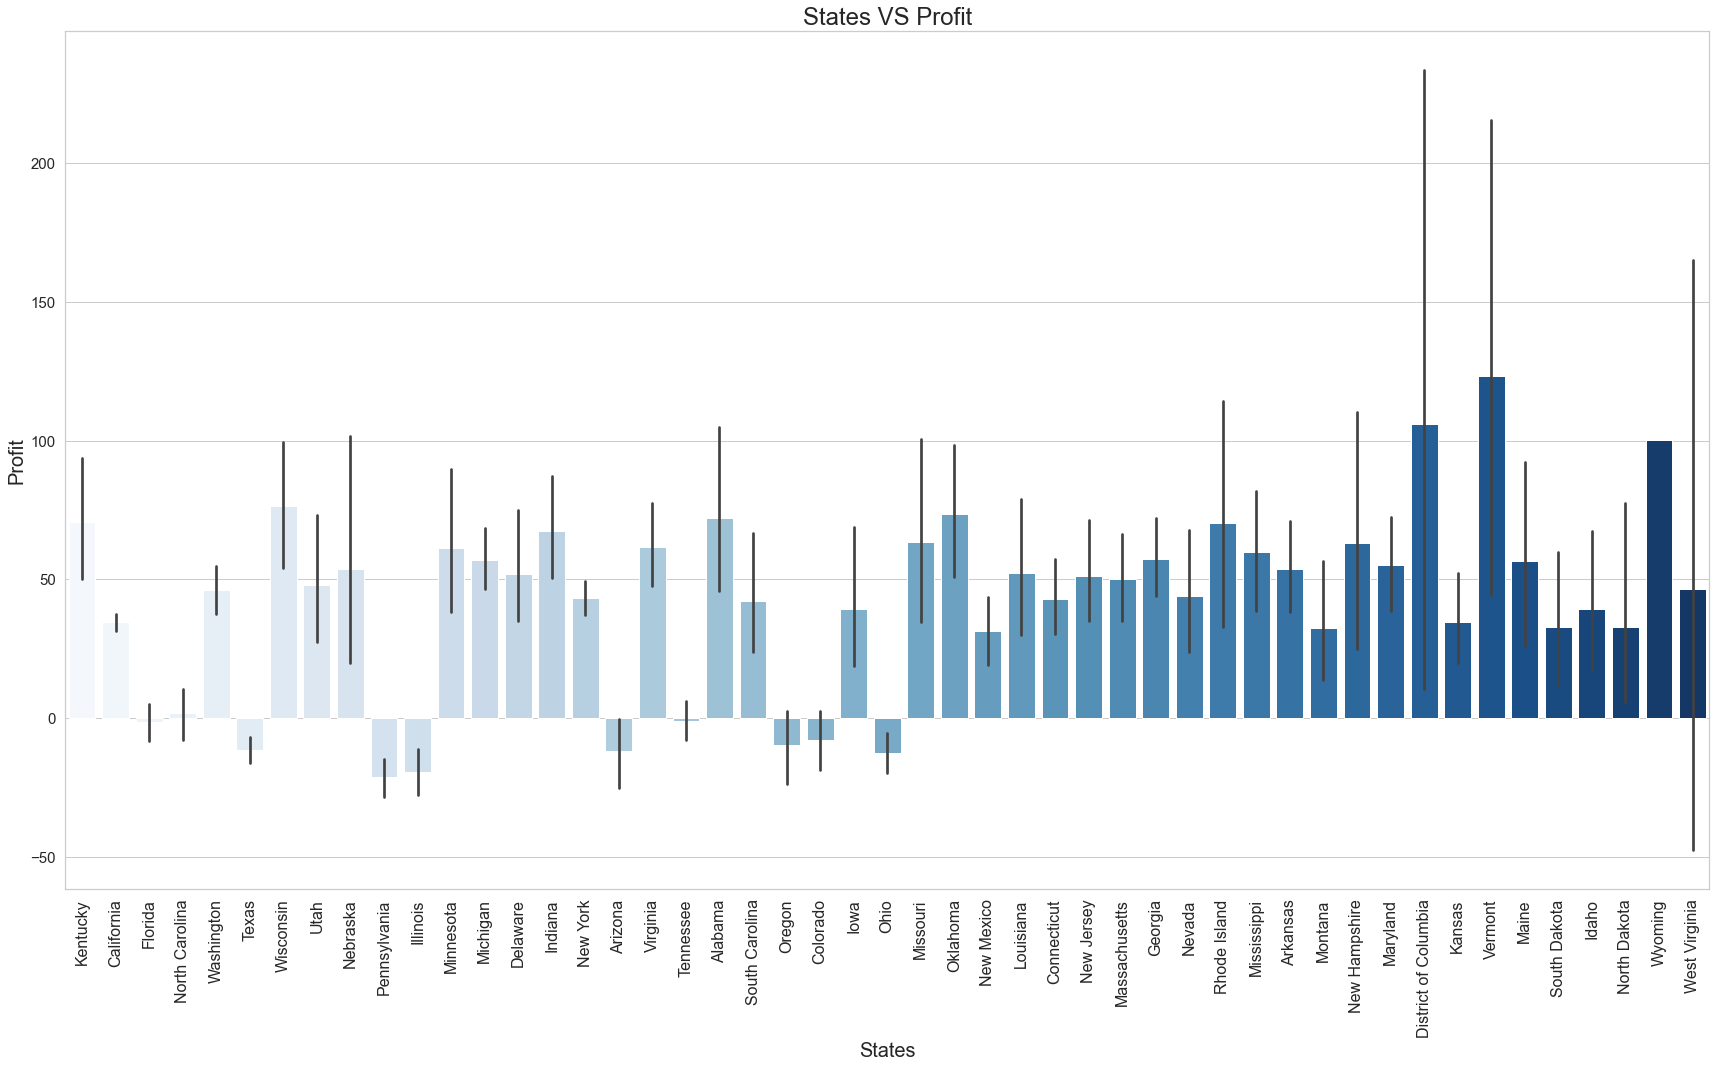

In [45]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds, palette="Blues",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

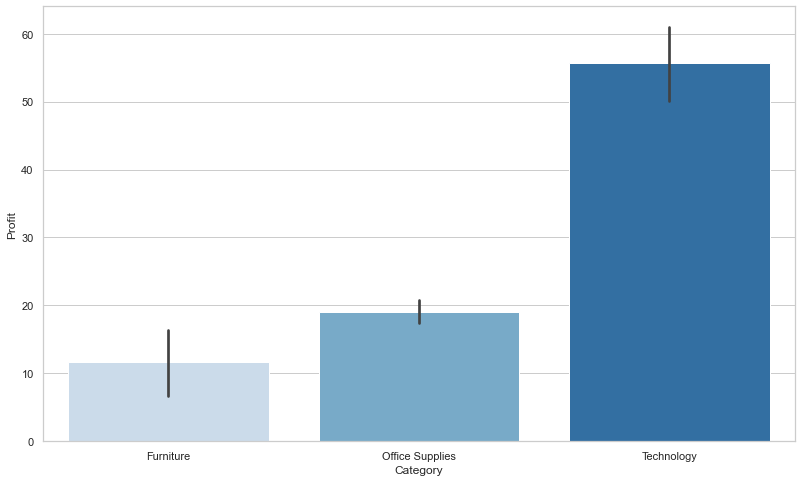

In [46]:
#Category Wise profit in the whole country
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit", data=ds, palette="Blues")

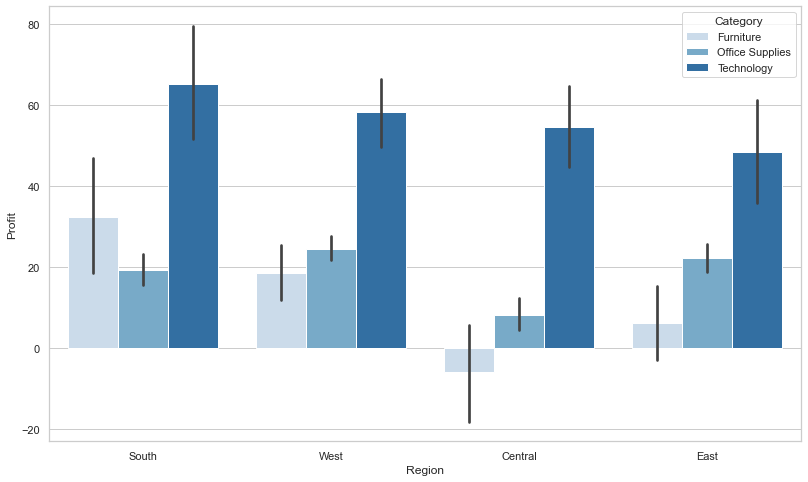

In [47]:
#Category wise Profit in Each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=ds, palette="Blues")

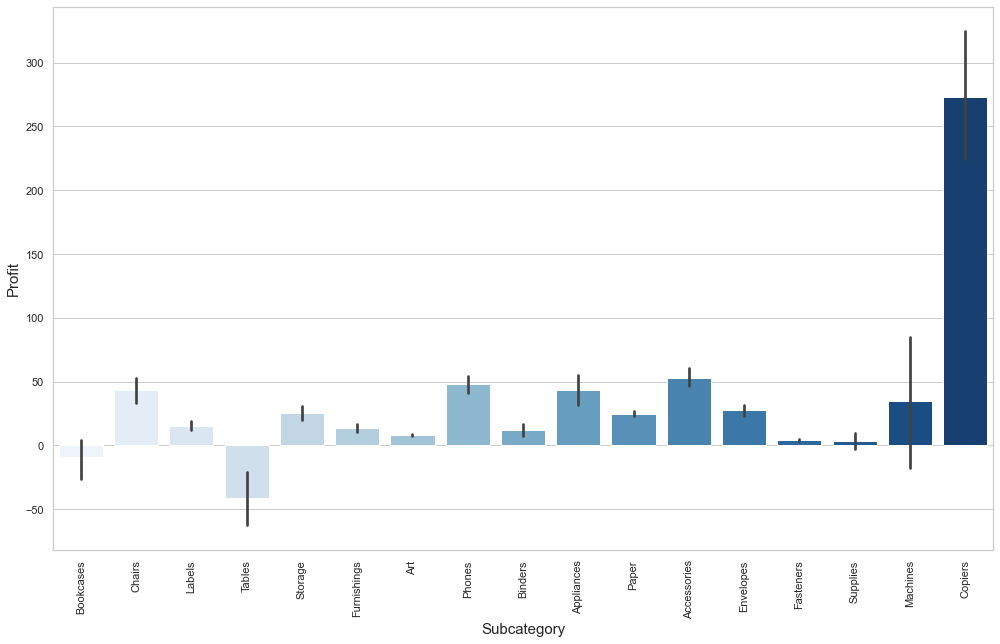

In [48]:
#Subcategory wise profit
plt.figure(figsize=[15,10])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds, palette="Blues")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [49]:
#Entries with Category=Technology
ds_tech=ds[(ds['Category']=="Technology")]
ds_tech.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,2014-08-27,2014-09-01,Second Class,Zuschuss Donatelli,Consumer,San Francisco,California,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,2016-01-16,2016-01-20,Second Class,Eric Hoffmann,Consumer,Los Angeles,California,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,2016-12-08,2016-12-10,First Class,Gene Hale,Corporate,Richardson,Texas,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737


Text(0, 0.5, 'Sales')

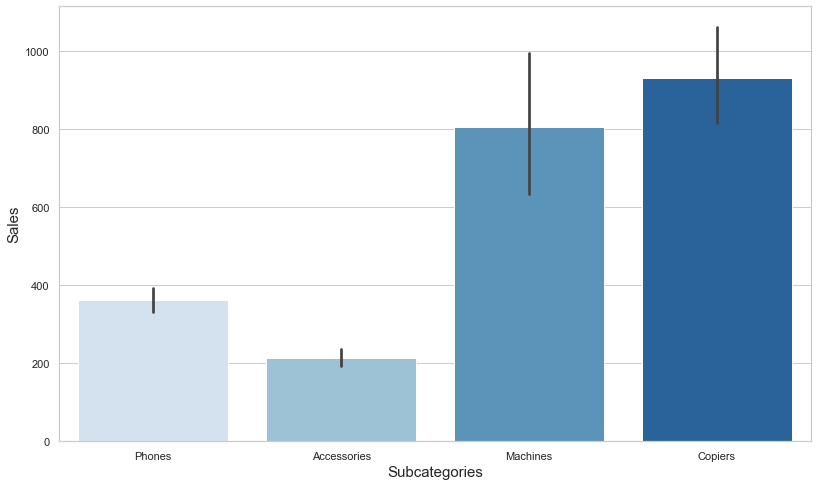

In [50]:
#Let's get the Sales of each Subcategory under Technology
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Sales", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

Text(0, 0.5, 'Profit')

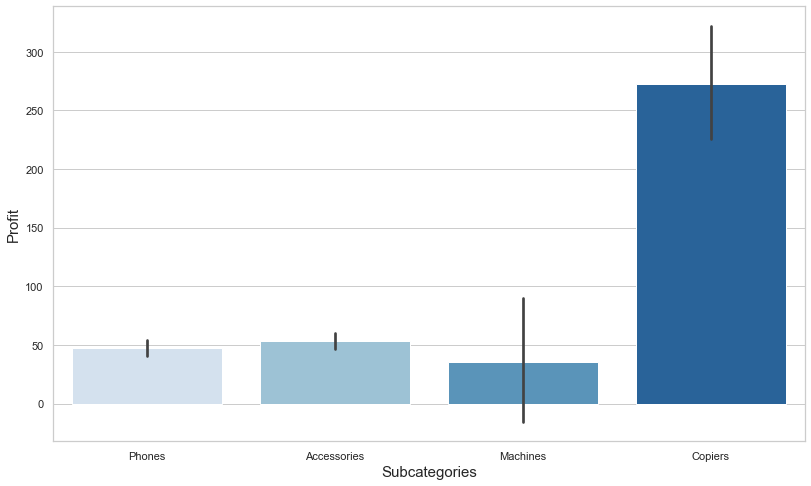

In [51]:
#Let's get the Profit of each Subcategory under Technology
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

Text(0, 0.5, 'Profit')

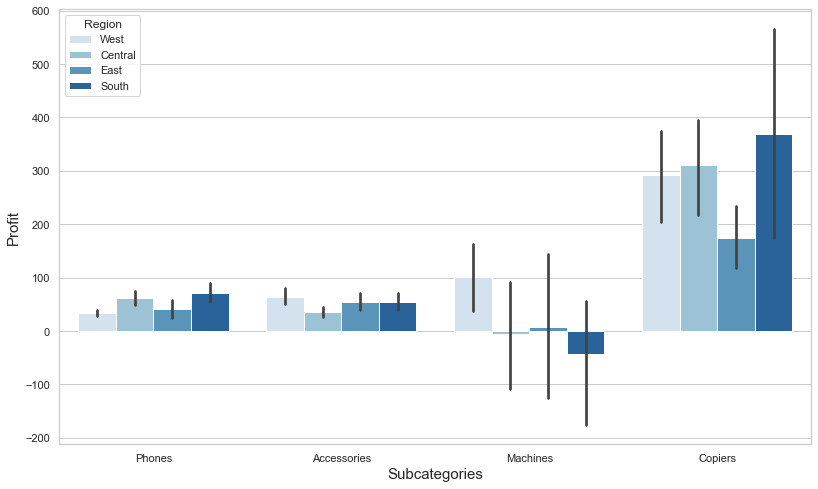

In [52]:
#Let's get the Profit of each Subcategory under Technology for each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

Text(0, 0.5, 'Profit')

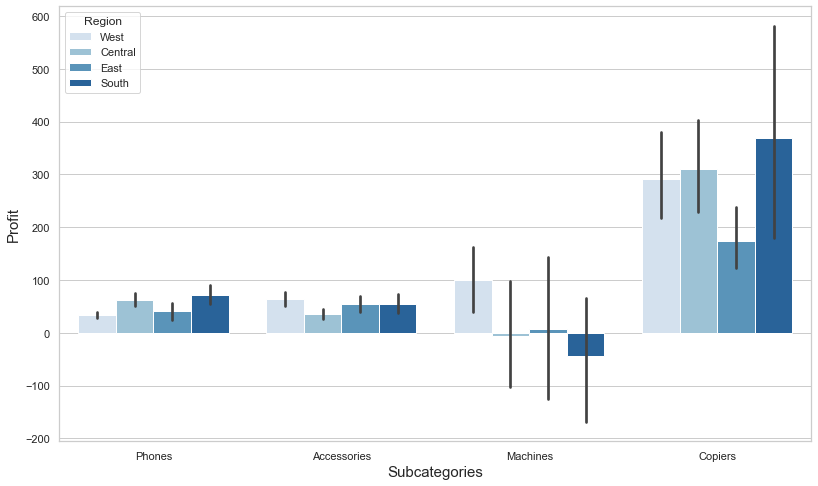

In [53]:
#Let's get the Profit of each Subcategory under Technology for each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)